# Nubmer of Visualizations in each Figure Count Algorithm

## Importing the Necessary Libraries and the Path

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from scipy.stats import chi2

curPlace = os.getcwd()
Place = curPlace + '\\captions'
placePath = pathlib.Path(Place)
allFiles = np.array(list(placePath.iterdir()))
alpha = 0.05

## Using Captions to Determine Visual Count

In [2]:
vizCount = np.array([1])
size = len(allFiles)
for j in range(0,size):
    #MAKE SURE TO REMOVE ANY SPECIAL CHARACTERS OR QUOTATION MARKS FROM THE CAPTIONS
    curFile = open(str(allFiles[j]), 'r+')
    text = curFile.read()

    allInds = np.array([])
    
    for i in range(65,90):
        lookFor = '(' + chr(i) + ')'
        inds = text.find(lookFor)
    
        if inds != -1:
            allInds = np.hstack((allInds, 1))
    
    for i in range(97,122):
        lookFor = '(' + chr(i) + ')'
        inds = text.find(lookFor)
    
        if inds != -1:
            allInds = np.hstack((allInds, 1))

    if len(allInds) == 0:
        allInds = np.hstack((allInds,1))
        
    vizCount = np.vstack((vizCount, len(allInds)))
    
length = len(vizCount)
vizCount = vizCount[1:length]

## Collecting all of the Names of the Figures

In [3]:
nameList = np.array(["Name"])

for i in allFiles:
    pathString = str(i)
    ind = pathString.find('Caption')
    length = len(pathString)
    name = pathString[ind:length]

    ind = name.find('.')
    name = name[0:ind]
    ind = name.find(' ')
    length = len(name)
    name = name[ind:length]
    name2 = np.array('Figure' + name)
    nameList = np.vstack((nameList, name2))
    
size = nameList.shape
nameList = nameList[1:size[0]]


## Creating the Spreadsheets and Figure Outputs Directory if it does not Exist

In [4]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\spreadsheets'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

In [5]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\figure outputs'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

## Exporting the Data into a Spreadsheet

In [6]:
data = pd.DataFrame(vizCount, columns = [ "Calculated Visual Count"])
nameData = pd.DataFrame(nameList, columns = ["Figure Number"])
newData = pd.concat([nameData, data], axis =1, join = "inner")
newData.to_excel(curPlace + '\spreadsheets\Calculated Visual Count.xlsx')

## Importing the Visual Count Data

In [7]:
curPlace = os.getcwd()
Place = curPlace + '\spreadsheets\Calculated Visual Count.xlsx'

## Getting the Maximum Visual Count Figure

In [8]:
data = pd.read_excel(Place)
count = data.iloc[:,2]
names = data.iloc[:,1]

size = data.shape
rows = size[0]
i = 0
curCount = 0

while i < rows:
    curNum = count.iloc[i]

    if curNum >= curCount:
        curCount = curNum

        maxidx = i
        
    i = i + 1
print(maxidx)

129


## Getting the Minimum Visual Count Figure

In [9]:
data = pd.read_excel(Place)
count = data.iloc[:,2]

size = data.shape
rows = size[0]
i = 0
curCount = 100

while i < rows:
    curNum = count.iloc[i]
    if curNum < curCount:
        curCount = curNum
        minidx = i
        
    i = i + 1

print(minidx)

13


## Finding the Min and Max Location and Displaying Their Images

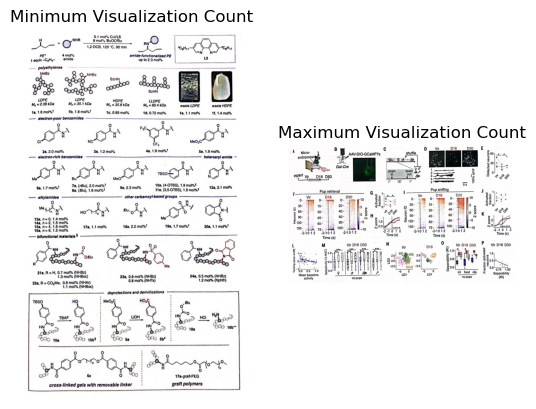

In [10]:
maxName = names.iloc[maxidx]
minName = names.iloc[minidx]

curPlace = os.getcwd()
minPlace = curPlace + '\data' + '\\' + str(minName) + '.tiff'
maxPlace = curPlace + '\data' + '\\' + str(maxName) + '.tiff'

minImg = cv2.imread(minPlace)
minImg = cv2.cvtColor(minImg, cv2.COLOR_BGR2RGB)
maxImg = cv2.imread(maxPlace)
maxImg = cv2.cvtColor(maxImg, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(minImg)
plt.title('Minimum Visualization Count')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(maxImg)
plt.title('Maximum Visualization Count')
plt.axis('off')
plt.savefig(os.getcwd() + '\\figure outputs\\Min and Max Visualization Count.png')

## Determining the Chi-Square Statistics

In [11]:
manualCount = pd.read_excel('testDataManualVizCount.xlsx')
manualCount = manualCount.to_numpy()
manualCount = manualCount[:,1]

curPlace = os.getcwd()
Place = curPlace + '\spreadsheets\Calculated Visual Count.xlsx'
expectedCount = pd.read_excel(Place)
expectedCount = expectedCount.to_numpy()
expectedCount = expectedCount[:,2]

Chi = (expectedCount - manualCount)**2
Chi = Chi/expectedCount
Chi2 = []

## removes any drastic outliers
for i in range(len(Chi)):
    if Chi[i] < 30:
        Chi2 = np.hstack((Chi2, Chi[i]))

Chi = np.sum(Chi)
Chi2 = np.sum(Chi2)
print('Chi Square with outliers is: ' + str(Chi))
print('Chi Square without outliers is: '+ str(Chi2))

Chi Square with outliers is: 254.22445054945058
Chi Square without outliers is: 58.224450549450545


## Determining the P-Values

In [12]:
manualCount = manualCount.reshape(-1,1)

expectedCount = expectedCount.reshape(-1,1)

combined = np.hstack((manualCount, expectedCount))

chi_squared = Chi

# Degrees of freedom calculation
degrees_of_freedom = manualCount.size - 1

# Calculate the p-value
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

print('The p value for counts with outliers is: ' + str(p_value))

chi_squared2 = Chi2

# Degrees of freedom calculation
degrees_of_freedom2 = manualCount.size - 1

# Calculate the p-value
p_value2 = 1 - chi2.cdf(chi_squared2, degrees_of_freedom2)

print('The p value for counts without outliers is: ' + str(p_value2))

The p value for counts with outliers is: 0.00032478752942088907
The p value for counts without outliers is: 1.0


## Determining Outcomes of the P-Values

In [13]:
if p_value < alpha:
    if p_value2 < alpha:
        print('There are likely no outliers as both p-values indicate a significant difference between the observed and expected values')
    elif p_value2 > alpha:
        print(' There is likely outliers as there is a significant difference between the observed and counted values until outliers are removed')
elif p_value > alpha:
    if p_value2 > alpha:
         print('There are likely no outliers as both p-values indicate there is not a significant difference between the observed and expected values')
    elif p_value2 < alpha:
        print(' There is likely outliers as there is not a significant difference between the observed and counted values until outliers are removed')
        

 There is likely outliers as there is a significant difference between the observed and counted values until outliers are removed
